### Ben Porter
### This HW is due on  10/27 at 11:59 pm
We are using the same data as in Lab 6.

The data set called Highway1 (used by  by Carl Hoffstedt in his paper: https://rdrr.io/rforge/alr4/man/Highway1.html) relate the automobile accident rate, in accidents per million vehicle miles to several potential terms. The data include 39 sections of large Highways in the state of Minnesota in 1973. The goal of this analysis is to see how the rate variable are affetcted by some of the variables that are highly correlated with the rate and finding out which ones affect the rate variable the most.

This data frame contains the following columns:

adt - average daily traffic count in thousands

trks - truck volume as a percent of the total volume

lane - total number of lanes of traffic

acpt - number of access points per mile

sigs - number of signalized interchanges per mile

itg - number of freeway-type interchanges per mile

slim - speed limit in 1973

len - length of the Highway segment in miles

lwid - lane width, in feet

shld - width in feet of outer shoulder on the roadway

htype - An indicator of the type of roadway or the source of funding for the road; "mc" for major collector, "fai" for Federal interstate highways, "pa" for principal arterial highway, and "ma" for major arterial highways

rate - 1973 accident rate per million vehicle miles

In [52]:
import pandas as pd
import numpy as np
import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
highway1 = pd.read_csv('Highway1.csv')

## Problem 1
This data came from R package which uses index starting at 1 unlike in python where indices  start at 0. When  you upload highway1 data to jupyter notebook, you will see an unnecessory column that says column 0. Find and remove it. Train a Leanear Regression model with Rate as a dependent variable and 10 numerical variables as features.
Write the regression equation and report the $R^2$ value in %. See how to use statmodels for this. https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html (20 points)


In [24]:
hwy1=highway1.drop(hwy1.columns[0],axis=1)
hwy1.head()

,rate,len,ADT,trks,sigs1,slim,shld,lane,acpt,itg,lwid,hwy
0,4.58,4.99,69,8,0.200401,55,10,8,4.6,1.20,12,FAI
1,2.86,16.11,73,8,0.062073,60,10,4,4.4,1.43,12,FAI
2,3.02,9.75,49,10,0.102564,60,10,4,4.7,1.54,12,FAI
3,2.29,10.65,61,13,0.093897,65,10,6,3.8,0.94,12,FAI
4,1.61,20.01,28,12,0.049975,70,10,4,2.2,0.65,12,FAI


In [25]:
X=hwy1[['len','ADT','trks','sigs1','slim','shld','lane','acpt','itg','lwid']]
y=hwy1[['rate']]
df=sm.OLS(y, X).fit()
df.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   rate   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.920
Method:                 Least Squares   F-statistic:                              45.72
Date:                Sun, 27 Oct 2019   Prob (F-statistic):                    4.83e-15
Time:                        16:55:27   Log-Likelihood:                         -58.098
No. Observations:                  39   AIC:                                      136.2
Df Residuals:                      29   BIC:                                      152.8
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
len           -0.0428      0.034     -1.266      0.216      -0.112       0.026
ADT            0.0007      0.034      0.020      0.984      -0.069       0.070
trks          -0.0740      0.107     -0.693      0.494      -0.293       0.145
sigs1          0.4883      0.427      1.144      0.262      -0.385       1.361
slim          -0.0326      0.065     -0.501      0.620      -0.166       0.101
shld          -0.0755      0.114     -0.663      0.513      -0.308       0.157
lane           0.0426      0.291      0.147      0.884      -0.552       0.637
acpt           0.1095      0.031      3.516      0.001       0.046       0.173
itg            0.2462      1.203      0.205      0.839      -2.215       2.708
lwid           0.4749      0.269      1.768      0.088      -0.074       1.024
==============================================================================
Omnibus:                        0.434   Durbin-Watson:                   2.541
Prob(Omnibus):                  0.805   Jarque-Bera (JB):                0.466
Skew:                           0.228   Prob(JB):                        0.792
Kurtosis:                       2.720   Cond. No.                         386.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Formula= Rate~len + ADT + trks + sigs1 + slim + shld + lane + acpt + itg + lwid

R^2= 92%

### Problem 2
In the summary of the model you did in problem 1, you will see all the variables labeled as x1 to x10. Here, x1 is 'len' and x2 is 'ADT' etc.  You will also see the corresponding p-values labeld as $p>|t|$. If the p value of one of the variable x is, say, 0.951 then it means that the probability of the variable x being 0 or close to 0 is 95.1%. This says that the variable x is not contributuing much in defining the regression equation. Read more here on how to interpret the regression output.
https://stats.idre.ucla.edu/stata/output/regression-analysis-2/
 Remove variables whose p-values are greater than 90%. And retrain the regression model. Write out the regression equation, together with $R^2$. (20 points)

In [26]:
X=hwy1[['len','trks','sigs1','slim','shld','lane','acpt','itg','lwid']]
y=hwy1[['rate']]
df1=sm.OLS(y, X).fit()
df1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   rate   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                              52.55
Date:                Sun, 27 Oct 2019   Prob (F-statistic):                    6.41e-16
Time:                        17:01:59   Log-Likelihood:                         -58.098
No. Observations:                  39   AIC:                                      134.2
Df Residuals:                      30   BIC:                                      149.2
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
len           -0.0429      0.033     -1.293      0.206      -0.111       0.025
trks          -0.0738      0.105     -0.705      0.486      -0.288       0.140
sigs1          0.4885      0.420      1.164      0.253      -0.368       1.345
slim          -0.0329      0.062     -0.527      0.602      -0.160       0.095
shld          -0.0750      0.109     -0.686      0.498      -0.298       0.148
lane           0.0459      0.240      0.192      0.849      -0.443       0.535
acpt           0.1094      0.030      3.609      0.001       0.047       0.171
itg            0.2660      0.700      0.380      0.707      -1.164       1.696
lwid           0.4758      0.261      1.823      0.078      -0.057       1.009
==============================================================================
Omnibus:                        0.426   Durbin-Watson:                   2.538
Prob(Omnibus):                  0.808   Jarque-Bera (JB):                0.461
Skew:                           0.226   Prob(JB):                        0.794
Kurtosis:                       2.720   Cond. No.                         223.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Formula= Rate~len + trks + sigs1 + slim + shld + lane + acpt + itg + lwid

R^2= 92.2%

### Problem 3
Your $R^2$ values from problem 1 and 2 are pretty close. You were able to remove some features without loosing much in $R^2$. Explain the details of the significance of this process. Why did we remove some variables and what impact this may have in our model? (20 points)

We were trying to reduce the amount of variables by removing varialbles that were relatively insignificant. This may have made the model slightly less accurate.

### Problem 4
Remove all the variables that have p-values greater than 80. Retrain the model and see how $R^2$ changes. Is it worth loosing the accuracy of $R^2$ in a plan to reduce number of variables in these problems? How you want to answer this is upto you. Looking at the correlation of the removed variables with the dependant variabe, plotting them together is one idea. Explain in details. (20 points)

In [27]:
X=hwy1[['len','trks','sigs1','slim','shld','acpt','itg','lwid']]
y=hwy1[['rate']]
df1=sm.OLS(y, X).fit()
df1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   rate   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.925
Method:                 Least Squares   F-statistic:                              61.01
Date:                Sun, 27 Oct 2019   Prob (F-statistic):                    8.02e-17
Time:                        17:06:53   Log-Likelihood:                         -58.122
No. Observations:                  39   AIC:                                      132.2
Df Residuals:                      31   BIC:                                      145.6
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
len           -0.0419      0.032     -1.299      0.203      -0.108       0.024
trks          -0.0751      0.103     -0.730      0.471      -0.285       0.135
sigs1          0.5196      0.381      1.365      0.182      -0.257       1.296
slim          -0.0336      0.061     -0.547      0.589      -0.159       0.092
shld          -0.0688      0.103     -0.669      0.509      -0.279       0.141
acpt           0.1083      0.029      3.699      0.001       0.049       0.168
itg            0.3504      0.536      0.653      0.518      -0.743       1.444
lwid           0.4849      0.253      1.920      0.064      -0.030       1.000
==============================================================================
Omnibus:                        0.419   Durbin-Watson:                   2.540
Prob(Omnibus):                  0.811   Jarque-Bera (JB):                0.508
Skew:                           0.220   Prob(JB):                        0.776
Kurtosis:                       2.655   Cond. No.                         169.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Formula= Rate~len + ADT + trks + sigs1 + slim + shld + acpt + itg + lwid

R^2= 92.5%

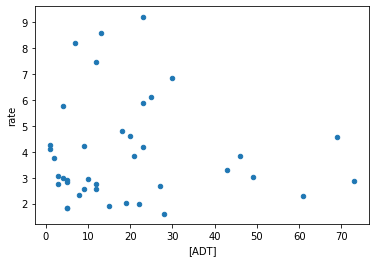

In [39]:
plot1=hwy1.plot(['ADT'],'rate',kind='scatter')

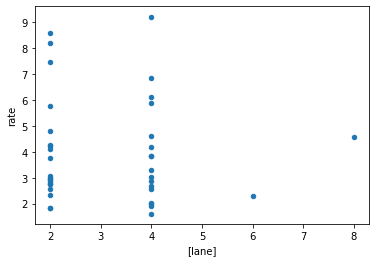

In [44]:
plot2=hwy1.plot(['lane'],'rate',kind='scatter')

I think we should take out these variables. These variables have little to no correlation with the dependant variable so I think the difference in accuracy is small enough to be ignored.

### Problem 5
Find out 3 variables which are correlated very highly (positive or negative) with rate variable. Create 3 comuns with the squared values from these columns. For example, if x is one of those 3 variables, then create a new column with $x^2$ values. Name the colum appropriately. For each variable, create a nonlinear model of the form
$y= a + bx +cx^2$. Make  scatter plots together with these quadratic functions to see how this nonlinear model that we came up with using linear model fits the data.
(20 points)

acpt lwid sigs1

In [45]:
hwy2=hwy1
hwy2['acpt^2']=hwy2['acpt']*hwy2['acpt']

In [46]:
hwy2['lwid^2']=hwy2['lwid']*hwy2['lwid']

In [47]:
hwy2['sigs1^2']=hwy2['sigs1']*hwy2['sigs1']

In [53]:
X=hwy1[['sigs1^2','acpt^2','lwid^2']]
y=hwy1[['rate']]
df2=sm.OLS(y, X).fit()
df2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   rate   R-squared (uncentered):                   0.889
Model:                            OLS   Adj. R-squared (uncentered):              0.880
Method:                 Least Squares   F-statistic:                              96.32
Date:                Sun, 27 Oct 2019   Prob (F-statistic):                    2.92e-17
Time:                        17:36:23   Log-Likelihood:                         -70.171
No. Observations:                  39   AIC:                                      146.3
Df Residuals:                      36   BIC:                                      151.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sigs1^2        0.1933      0.236      0.817      0.419      -0.286       0.673
acpt^2         0.0024      0.001      3.123      0.004       0.001       0.004
lwid^2         0.0225      0.002     11.753      0.000       0.019       0.026
==============================================================================
Omnibus:                        6.411   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                5.400
Skew:                           0.896   Prob(JB):                       0.0672
Kurtosis:                       3.337   Cond. No.                         506.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

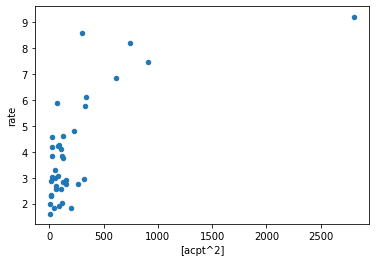

In [54]:
plot3=hwy1.plot(['acpt^2'],'rate',kind='scatter')

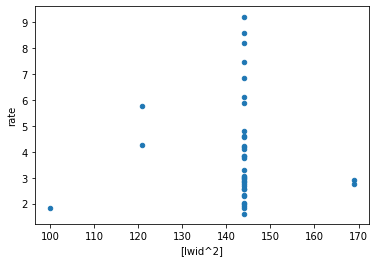

In [55]:
plot4=hwy1.plot(['lwid^2'],'rate',kind='scatter')

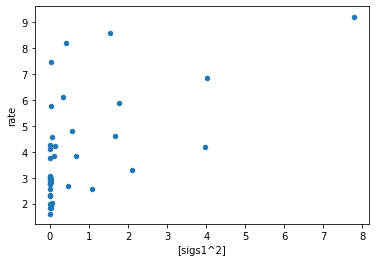

In [56]:
plot5=hwy1.plot(['sigs1^2'],'rate',kind='scatter')